# Mental Health Screening Tool
## Depression and Anxiety Assessment System

**Author:** Anita Izedike Benson 
**Date:** December 2025  
**Purpose:** This tool provides standardized mental health screening using PHQ-9 (depression) and GAD-7 (anxiety) assessments.

### About This Project
This screening tool helps identify symptoms of depression and anxiety using clinically validated questionnaires. It provides:
- Standardized PHQ-9 depression assessment (0-27 scale)
- GAD-7 anxiety assessment (0-21 scale)
- Symptom analysis and condition matching
- Urgency level classification
- Personalized recommendations

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [4]:
# Mental health symptom database
# Maps symptoms to potential conditions

mental_health_symptoms = {
    # Depression symptoms
    'persistent_sadness': ['Major Depression', 'Persistent Depressive Disorder', 'Adjustment Disorder'],
    'loss_of_interest': ['Major Depression', 'Persistent Depressive Disorder', 'Burnout'],
    'fatigue': ['Major Depression', 'Anxiety', 'Burnout', 'Sleep Disorders'],
    'sleep_problems': ['Major Depression', 'Anxiety', 'Insomnia', 'Bipolar Disorder'],
    'appetite_changes': ['Major Depression', 'Anxiety', 'Eating Disorders'],
    'difficulty_concentrating': ['Major Depression', 'Anxiety', 'ADHD'],
    'feelings_of_worthlessness': ['Major Depression', 'Low Self-Esteem'],
    'thoughts_of_death': ['Major Depression', 'Suicidal Ideation'],
    'psychomotor_changes': ['Major Depression', 'Bipolar Disorder'],
    
    # Anxiety symptoms
    'excessive_worry': ['Generalized Anxiety Disorder', 'Social Anxiety', 'Health Anxiety'],
    'restlessness': ['Generalized Anxiety Disorder', 'ADHD'],
    'muscle_tension': ['Generalized Anxiety Disorder', 'Stress'],
    'panic_attacks': ['Panic Disorder', 'Generalized Anxiety Disorder', 'PTSD'],
    'avoidance_behavior': ['Social Anxiety', 'Panic Disorder', 'PTSD', 'Phobias'],
    'racing_thoughts': ['Generalized Anxiety Disorder', 'Bipolar Disorder'],
    'sweating_trembling': ['Panic Disorder', 'Social Anxiety', 'Generalized Anxiety Disorder'],
    'fear_of_losing_control': ['Panic Disorder', 'Generalized Anxiety Disorder'],
    
    # Shared symptoms
    'irritability': ['Major Depression', 'Generalized Anxiety Disorder', 'Bipolar Disorder'],
    'social_withdrawal': ['Major Depression', 'Social Anxiety', 'Avoidant Personality Disorder'],
    'difficulty_relaxing': ['Generalized Anxiety Disorder', 'Stress', 'PTSD']
}

print(f"✓ Loaded {len(mental_health_symptoms)} symptoms")

✓ Loaded 20 symptoms


In [5]:
# Severity and category information for each condition

condition_info = {
    'Major Depression': {'severity': 4, 'category': 'Depression'},
    'Persistent Depressive Disorder': {'severity': 3, 'category': 'Depression'},
    'Generalized Anxiety Disorder': {'severity': 3, 'category': 'Anxiety'},
    'Panic Disorder': {'severity': 4, 'category': 'Anxiety'},
    'Social Anxiety': {'severity': 3, 'category': 'Anxiety'},
    'PTSD': {'severity': 4, 'category': 'Trauma-Related'},
    'Bipolar Disorder': {'severity': 5, 'category': 'Mood Disorder'},
    'Adjustment Disorder': {'severity': 2, 'category': 'Stress-Related'},
    'Burnout': {'severity': 3, 'category': 'Stress-Related'},
    'Sleep Disorders': {'severity': 2, 'category': 'Sleep-Related'},
    'Health Anxiety': {'severity': 2, 'category': 'Anxiety'},
    'Phobias': {'severity': 2, 'category': 'Anxiety'},
    'ADHD': {'severity': 2, 'category': 'Neurodevelopmental'},
    'Eating Disorders': {'severity': 4, 'category': 'Eating-Related'},
    'Suicidal Ideation': {'severity': 5, 'category': 'Crisis'},
    'Low Self-Esteem': {'severity': 2, 'category': 'Self-Concept'},
    'Stress': {'severity': 2, 'category': 'Stress-Related'},
    'Insomnia': {'severity': 2, 'category': 'Sleep-Related'},
    'Avoidant Personality Disorder': {'severity': 3, 'category': 'Personality'}
}

print(f"✓ Loaded {len(condition_info)} conditions with severity ratings")

✓ Loaded 19 conditions with severity ratings


In [6]:
# PHQ-9 Depression Assessment Questions
depression_questions = [
    "1. Little interest or pleasure in doing things",
    "2. Feeling down, depressed, or hopeless",
    "3. Trouble falling/staying asleep, or sleeping too much",
    "4. Feeling tired or having little energy",
    "5. Poor appetite or overeating",
    "6. Feeling bad about yourself or that you're a failure",
    "7. Trouble concentrating on things",
    "8. Moving or speaking slowly, or being fidgety/restless",
    "9. Thoughts that you would be better off dead or hurting yourself"
]

# GAD-7 Anxiety Assessment Questions
anxiety_questions = [
    "1. Feeling nervous, anxious, or on edge",
    "2. Not being able to stop or control worrying",
    "3. Worrying too much about different things",
    "4. Trouble relaxing",
    "5. Being so restless that it's hard to sit still",
    "6. Becoming easily annoyed or irritable",
    "7. Feeling afraid as if something awful might happen"
]

print("✓ PHQ-9 Questions:", len(depression_questions))
print("✓ GAD-7 Questions:", len(anxiety_questions))

✓ PHQ-9 Questions: 9
✓ GAD-7 Questions: 7


In [7]:
class MentalHealthScreener:
    """
    A comprehensive mental health screening tool that assesses depression and anxiety
    using standardized clinical questionnaires (PHQ-9 and GAD-7).
    """
    
    def __init__(self):
        """Initialize the screener with empty data storage"""
        self.screening_data = []
        print("✓ Mental Health Screener initialized")
        
    def collect_patient_info(self, name, age, gender):
        """
        Collect basic patient information
        
        Parameters:
        - name (str): Patient name or identifier
        - age (int): Patient age
        - gender (str): Patient gender
        
        Returns:
        - dict: Patient information with timestamp
        """
        return {
            'name': name,
            'age': age,
            'gender': gender,
            'date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
    
    def calculate_depression_score(self, responses):
        """
        Calculate depression score using PHQ-9 methodology
        
        Parameters:
        - responses (list): 9 integers on 0-3 scale
          0 = Not at all
          1 = Several days
          2 = More than half the days
          3 = Nearly every day
        
        Returns:
        - tuple: (total_score, severity_level)
        """
        if len(responses) != 9:
            return None, "Invalid: Need exactly 9 responses"
        
        total_score = sum(responses)
        
        # PHQ-9 severity classification
        if total_score <= 4:
            severity = "Minimal depression"
        elif total_score <= 9:
            severity = "Mild depression"
        elif total_score <= 14:
            severity = "Moderate depression"
        elif total_score <= 19:
            severity = "Moderately severe depression"
        else:
            severity = "Severe depression"
            
        return total_score, severity
    
    def calculate_anxiety_score(self, responses):
        """
        Calculate anxiety score using GAD-7 methodology
        
        Parameters:
        - responses (list): 7 integers on 0-3 scale
        
        Returns:
        - tuple: (total_score, severity_level)
        """
        if len(responses) != 7:
            return None, "Invalid: Need exactly 7 responses"
        
        total_score = sum(responses)
        
        # GAD-7 severity classification
        if total_score <= 4:
            severity = "Minimal anxiety"
        elif total_score <= 9:
            severity = "Mild anxiety"
        elif total_score <= 14:
            severity = "Moderate anxiety"
        else:
            severity = "Severe anxiety"
            
        return total_score, severity
    
    def screen_symptoms(self, symptoms):
        """
        Analyze symptoms and match to possible conditions
        
        Parameters:
        - symptoms (list): List of symptom strings
        
        Returns:
        - list: Sorted list of (condition, match_score) tuples
        """
        if not symptoms:
            return None
        
        condition_scores = {}
        
        # Count how many symptoms match each condition
        for symptom in symptoms:
            if symptom in mental_health_symptoms:
                for condition in mental_health_symptoms[symptom]:
                    condition_scores[condition] = condition_scores.get(condition, 0) + 1
        
        # Sort by match score (highest first)
        sorted_conditions = sorted(condition_scores.items(), 
                                   key=lambda x: x[1], 
                                   reverse=True)
        
        return sorted_conditions
    
    def assess_urgency(self, symptoms, depression_score=None, anxiety_score=None):
        """
        Assess urgency level based on symptoms and scores
        
        Returns:
        - tuple: (urgency_description, urgency_level_1_to_5)
        """
        crisis_symptoms = ['thoughts_of_death']
        
        # Crisis level check
        if any(symptom in symptoms for symptom in crisis_symptoms):
            return "CRISIS - Seek immediate help", 5
        
        # Score-based urgency
        max_severity = 1
        
        if depression_score and depression_score >= 20:
            max_severity = 5
        elif anxiety_score and anxiety_score >= 15:
            max_severity = 4
        elif (depression_score and depression_score >= 15) or (anxiety_score and anxiety_score >= 10):
            max_severity = 3
        elif (depression_score and depression_score >= 10) or (anxiety_score and anxiety_score >= 5):
            max_severity = 2
        
        urgency_levels = {
            5: "CRISIS - Contact emergency services or crisis hotline immediately",
            4: "High - Schedule appointment with mental health professional this week",
            3: "Moderate - Schedule appointment with mental health professional soon",
            2: "Low-Moderate - Consider speaking with a counselor or therapist",
            1: "Low - Monitor symptoms and practice self-care"
        }
        
        return urgency_levels[max_severity], max_severity
    
    def generate_recommendations(self, urgency_level):
        """Generate personalized recommendations based on urgency"""
        if urgency_level == 5:
            return [
                "🚨 Contact National Suicide Prevention Lifeline: 988 (US)",
                "🚨 Go to nearest emergency room if in immediate danger",
                "🚨 Call emergency services (911 in US)",
                "Contact a trusted friend or family member immediately"
            ]
        elif urgency_level == 4:
            return [
                "Schedule an appointment with a psychiatrist or psychologist",
                "Contact your primary care physician",
                "Consider intensive outpatient programs",
                "Reach out to trusted friends or family for support"
            ]
        elif urgency_level == 3:
            return [
                "Schedule an appointment with a licensed therapist or counselor",
                "Consider cognitive behavioral therapy (CBT)",
                "Practice stress management techniques",
                "Maintain regular sleep schedule and exercise routine"
            ]
        else:
            return [
                "Practice mindfulness and meditation",
                "Maintain healthy lifestyle (exercise, sleep, nutrition)",
                "Connect with supportive friends and family",
                "Consider journaling or creative outlets",
                "Monitor symptoms and seek help if they worsen"
            ]
    
    def generate_report(self, patient_info, depression_score=None, anxiety_score=None, 
                       symptoms=None, conditions=None):
        """Generate comprehensive screening report"""
        urgency = self.assess_urgency(
            symptoms if symptoms else [], 
            depression_score[0] if depression_score else None,
            anxiety_score[0] if anxiety_score else None
        )
        
        recommendations = self.generate_recommendations(urgency[1])
        
        report = {
            'Patient Information': patient_info,
            'Depression Assessment': depression_score,
            'Anxiety Assessment': anxiety_score,
            'Reported Symptoms': symptoms,
            'Possible Conditions': conditions[:5] if conditions else [],
            'Urgency Level': urgency[0],
            'Urgency Score': urgency[1],
            'Recommendations': recommendations
        }
        
        self.screening_data.append(report)
        return report
    
    def display_report(self, report):
        """Display formatted screening report"""
        print("\n" + "="*70)
        print("MENTAL HEALTH SCREENING REPORT")
        print("="*70)
        print(f"\nPatient: {report['Patient Information']['name']}")
        print(f"Age: {report['Patient Information']['age']}")
        print(f"Gender: {report['Patient Information']['gender']}")
        print(f"Date: {report['Patient Information']['date']}")
        
        print("\n" + "-"*70)
        print("ASSESSMENT SCORES:")
        
        if report['Depression Assessment']:
            dep_score, dep_severity = report['Depression Assessment']
            print(f"  Depression (PHQ-9): {dep_score}/27 - {dep_severity}")
        
        if report['Anxiety Assessment']:
            anx_score, anx_severity = report['Anxiety Assessment']
            print(f"  Anxiety (GAD-7): {anx_score}/21 - {anx_severity}")
        
        if report['Reported Symptoms']:
            print("\n" + "-"*70)
            print("REPORTED SYMPTOMS:")
            for symptom in report['Reported Symptoms']:
                print(f"  • {symptom.replace('_', ' ').title()}")
        
        if report['Possible Conditions']:
            print("\n" + "-"*70)
            print("POSSIBLE CONDITIONS (ranked by symptom match):")
            for i, (condition, score) in enumerate(report['Possible Conditions'], 1):
                severity = condition_info.get(condition, {}).get('severity', 0)
                category = condition_info.get(condition, {}).get('category', 'Other')
                print(f"  {i}. {condition}")
                print(f"     Category: {category} | Severity: {severity}/5 | Match Score: {score}")
        
        print("\n" + "-"*70)
        print(f"URGENCY ASSESSMENT: {report['Urgency Level']}")
        
        print("\n" + "-"*70)
        print("RECOMMENDATIONS:")
        for rec in report['Recommendations']:
            print(f"  • {rec}")
        
        print("\n" + "="*70)
        print("⚠️  DISCLAIMER: This is a screening tool only, NOT a diagnosis.")
        print("Always consult with a qualified mental health professional.")
        print("="*70 + "\n")
    
    def visualize_scores(self, report):
        """Create bar chart visualization of scores"""
        scores = []
        labels = []
        max_scores = []
        
        if report['Depression Assessment']:
            scores.append(report['Depression Assessment'][0])
            labels.append('Depression\n(PHQ-9)')
            max_scores.append(27)
        
        if report['Anxiety Assessment']:
            scores.append(report['Anxiety Assessment'][0])
            labels.append('Anxiety\n(GAD-7)')
            max_scores.append(21)
        
        if scores:
            fig, ax = plt.subplots(figsize=(10, 6))
            x = np.arange(len(labels))
            width = 0.35
            
            bars1 = ax.bar(x - width/2, scores, width, label='Current Score', color='#ff6b6b')
            bars2 = ax.bar(x + width/2, max_scores, width, label='Maximum Score', color='#95e1d3', alpha=0.5)
            
            ax.set_ylabel('Score', fontsize=12)
            ax.set_title('Mental Health Assessment Scores', fontsize=14, fontweight='bold')
            ax.set_xticks(x)
            ax.set_xticklabels(labels)
            ax.legend()
            ax.grid(axis='y', alpha=0.3)
            
            for bar in bars1:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontweight='bold')
            
            plt.tight_layout()
            plt.show()

print("✓ MentalHealthScreener class defined successfully")

✓ MentalHealthScreener class defined successfully


TEST CASE 1: Moderate Depression
✓ Mental Health Screener initialized

Depression Score: 13/27 - Moderate depression
Anxiety Score: 6/21 - Mild anxiety

MENTAL HEALTH SCREENING REPORT

Patient: Anonymous Patient A
Age: 28
Gender: Female
Date: 2025-12-27 19:54:18

----------------------------------------------------------------------
ASSESSMENT SCORES:
  Depression (PHQ-9): 13/27 - Moderate depression
  Anxiety (GAD-7): 6/21 - Mild anxiety

----------------------------------------------------------------------
REPORTED SYMPTOMS:
  • Persistent Sadness
  • Loss Of Interest
  • Fatigue
  • Sleep Problems
  • Difficulty Concentrating

----------------------------------------------------------------------
POSSIBLE CONDITIONS (ranked by symptom match):
  1. Major Depression
     Category: Depression | Severity: 4/5 | Match Score: 5
  2. Anxiety
     Category: Other | Severity: 0/5 | Match Score: 3
  3. Persistent Depressive Disorder
     Category: Depression | Severity: 3/5 | Match Score: 2


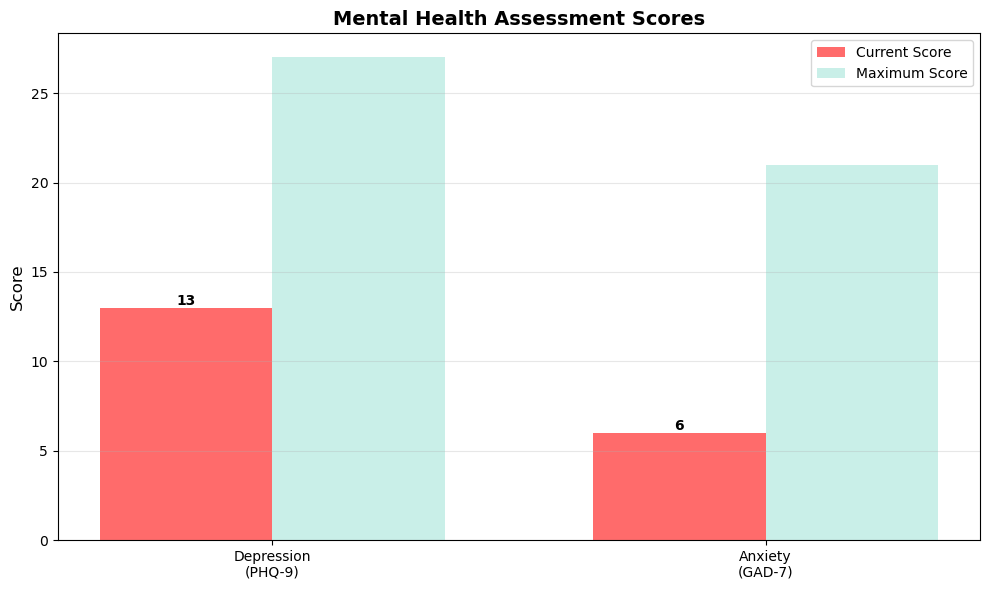

In [8]:
# Example 1: Patient with Moderate Depression

print("="*70)
print("TEST CASE 1: Moderate Depression")
print("="*70)

# Initialize screener
screener = MentalHealthScreener()

# Collect patient information
patient1 = screener.collect_patient_info("Anonymous Patient A", 28, "Female")

# PHQ-9 responses (each question scored 0-3)
# This simulates a patient with moderate depression
dep_responses1 = [2, 2, 2, 2, 1, 1, 2, 1, 0]  # Total: 13
dep_score1 = screener.calculate_depression_score(dep_responses1)
print(f"\nDepression Score: {dep_score1[0]}/27 - {dep_score1[1]}")

# GAD-7 responses
anx_responses1 = [1, 1, 1, 1, 0, 1, 1]  # Total: 6
anx_score1 = screener.calculate_anxiety_score(anx_responses1)
print(f"Anxiety Score: {anx_score1[0]}/21 - {anx_score1[1]}")

# Reported symptoms
symptoms1 = ['persistent_sadness', 'loss_of_interest', 'fatigue', 
             'sleep_problems', 'difficulty_concentrating']
conditions1 = screener.screen_symptoms(symptoms1)

# Generate and display report
report1 = screener.generate_report(patient1, dep_score1, anx_score1, symptoms1, conditions1)
screener.display_report(report1)

# Visualize
screener.visualize_scores(report1)

TEST CASE 2: Severe Anxiety

Anxiety Score: 17/21 - Severe anxiety
Depression Score: 6/27 - Mild depression

MENTAL HEALTH SCREENING REPORT

Patient: Anonymous Patient B
Age: 35
Gender: Male
Date: 2025-12-27 19:55:20

----------------------------------------------------------------------
ASSESSMENT SCORES:
  Depression (PHQ-9): 6/27 - Mild depression
  Anxiety (GAD-7): 17/21 - Severe anxiety

----------------------------------------------------------------------
REPORTED SYMPTOMS:
  • Excessive Worry
  • Restlessness
  • Panic Attacks
  • Difficulty Relaxing
  • Racing Thoughts
  • Muscle Tension

----------------------------------------------------------------------
POSSIBLE CONDITIONS (ranked by symptom match):
  1. Generalized Anxiety Disorder
     Category: Anxiety | Severity: 3/5 | Match Score: 6
  2. PTSD
     Category: Trauma-Related | Severity: 4/5 | Match Score: 2
  3. Stress
     Category: Stress-Related | Severity: 2/5 | Match Score: 2
  4. Social Anxiety
     Category: Anxi

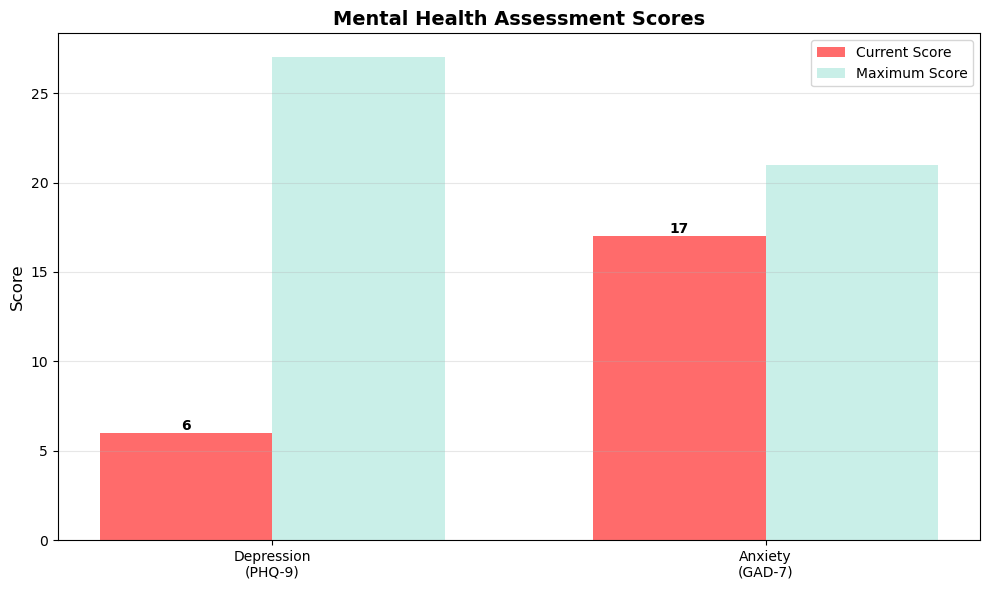

In [9]:
# Example 2: Patient with Severe Anxiety

print("="*70)
print("TEST CASE 2: Severe Anxiety")
print("="*70)

# Create new patient
patient2 = screener.collect_patient_info("Anonymous Patient B", 35, "Male")

# GAD-7 responses (severe anxiety)
anx_responses2 = [3, 3, 3, 2, 2, 2, 2]  # Total: 17
anx_score2 = screener.calculate_anxiety_score(anx_responses2)
print(f"\nAnxiety Score: {anx_score2[0]}/21 - {anx_score2[1]}")

# PHQ-9 responses (mild depression)
dep_responses2 = [1, 1, 1, 2, 0, 0, 1, 0, 0]  # Total: 6
dep_score2 = screener.calculate_depression_score(dep_responses2)
print(f"Depression Score: {dep_score2[0]}/27 - {dep_score2[1]}")

# Reported symptoms
symptoms2 = ['excessive_worry', 'restlessness', 'panic_attacks', 
             'difficulty_relaxing', 'racing_thoughts', 'muscle_tension']
conditions2 = screener.screen_symptoms(symptoms2)

# Generate and display report
report2 = screener.generate_report(patient2, dep_score2, anx_score2, symptoms2, conditions2)
screener.display_report(report2)

# Visualize
screener.visualize_scores(report2)

In [10]:
# Generate summary of all screenings

print("="*70)
print("SUMMARY OF ALL SCREENINGS")
print("="*70)

summary_data = []
for record in screener.screening_data:
    dep = record['Depression Assessment']
    anx = record['Anxiety Assessment']
    summary_data.append({
        'Patient': record['Patient Information']['name'],
        'Age': record['Patient Information']['age'],
        'Depression': f"{dep[0]}/27" if dep else "N/A",
        'Anxiety': f"{anx[0]}/21" if anx else "N/A",
        'Urgency Level': record['Urgency Score']
    })

df_summary = pd.DataFrame(summary_data)
display(df_summary)

SUMMARY OF ALL SCREENINGS


,Patient,Age,Depression,Anxiety,Urgency Level
0,Anonymous Patient A,28,13/27,6/21,2
1,Anonymous Patient B,35,6/27,17/21,4


In [11]:
# Display crisis and support resources

print("="*70)
print("🆘 CRISIS RESOURCES & SUPPORT")
print("="*70)
print("\nIf you or someone you know is in crisis:")
print("• National Suicide Prevention Lifeline (US): 988")
print("• Crisis Text Line: Text HOME to 741741")
print("• International: https://www.iasp.info/resources/Crisis_Centres/")
print("\n" + "="*70)

🆘 CRISIS RESOURCES & SUPPORT

If you or someone you know is in crisis:
• National Suicide Prevention Lifeline (US): 988
• Crisis Text Line: Text HOME to 741741
• International: https://www.iasp.info/resources/Crisis_Centres/



✨ CREATE YOUR OWN MENTAL HEALTH SCREENING

Instructions: Rate how often you've experienced each symptom
Over the LAST 2 WEEKS using this scale:
  0 = Not at all
  1 = Several days
  2 = More than half the days
  3 = Nearly every day

----------------------------------------------------------------------

📋 DEPRESSION ASSESSMENT (PHQ-9)
Modify the list below with your responses (9 numbers, each 0-3):

Your responses: [1, 1, 2, 1, 0, 0, 1, 0, 0]

📋 ANXIETY ASSESSMENT (GAD-7)
Modify the list below with your responses (7 numbers, each 0-3):

Your responses: [2, 2, 1, 1, 1, 1, 0]

📋 REPORTED SYMPTOMS
Available symptoms:
Depression: 'persistent_sadness', 'loss_of_interest', 'fatigue',
            'sleep_problems', 'appetite_changes', 'difficulty_concentrating'
Anxiety: 'excessive_worry', 'restlessness', 'panic_attacks',
         'muscle_tension', 'racing_thoughts', 'difficulty_relaxing'

Add symptoms you're experiencing:

Your symptoms: ['fatigue', 'excessive_worry', 'difficulty_concentratin

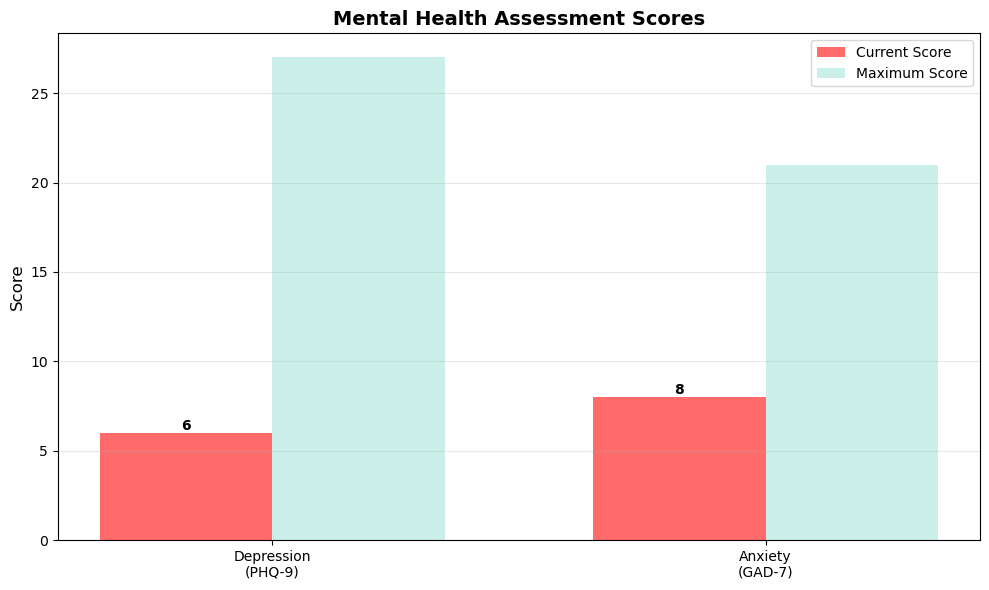


✅ Screening Complete!

💡 TIP: To run another screening, modify the numbers above and
   run this cell again (press Shift+Enter)


In [12]:
# INTERACTIVE DEMO - Try Your Own Assessment
print("="*70)
print("✨ CREATE YOUR OWN MENTAL HEALTH SCREENING")
print("="*70)
print("\nInstructions: Rate how often you've experienced each symptom")
print("Over the LAST 2 WEEKS using this scale:")
print("  0 = Not at all")
print("  1 = Several days")
print("  2 = More than half the days")
print("  3 = Nearly every day")
print("\n" + "-"*70)

# Example with clear instructions
print("\n📋 DEPRESSION ASSESSMENT (PHQ-9)")
print("Modify the list below with your responses (9 numbers, each 0-3):\n")

# User can easily modify these
my_depression_responses = [1, 1, 2, 1, 0, 0, 1, 0, 0]  # ← Change these numbers

print("Your responses:", my_depression_responses)

print("\n📋 ANXIETY ASSESSMENT (GAD-7)")
print("Modify the list below with your responses (7 numbers, each 0-3):\n")

my_anxiety_responses = [2, 2, 1, 1, 1, 1, 0]  # ← Change these numbers

print("Your responses:", my_anxiety_responses)

print("\n📋 REPORTED SYMPTOMS")
print("Available symptoms:")
print("Depression: 'persistent_sadness', 'loss_of_interest', 'fatigue',")
print("            'sleep_problems', 'appetite_changes', 'difficulty_concentrating'")
print("Anxiety: 'excessive_worry', 'restlessness', 'panic_attacks',")
print("         'muscle_tension', 'racing_thoughts', 'difficulty_relaxing'")
print("\nAdd symptoms you're experiencing:\n")

my_symptoms = ['fatigue', 'excessive_worry', 'difficulty_concentrating']  # ← Modify this list

print("Your symptoms:", my_symptoms)

print("\n" + "="*70)
print("🔄 RUNNING YOUR SCREENING...")
print("="*70)

# Create patient info
my_patient = screener.collect_patient_info("Anonymous User", 25, "Not Specified")

# Calculate scores
my_dep_score = screener.calculate_depression_score(my_depression_responses)
my_anx_score = screener.calculate_anxiety_score(my_anxiety_responses)
my_conditions = screener.screen_symptoms(my_symptoms)

# Generate report
my_report = screener.generate_report(my_patient, my_dep_score, my_anx_score, 
                                     my_symptoms, my_conditions)

# Display results
screener.display_report(my_report)

# Visualize
print("\n📊 Generating visualization...\n")
screener.visualize_scores(my_report)

print("\n" + "="*70)
print("✅ Screening Complete!")
print("="*70)
print("\n💡 TIP: To run another screening, modify the numbers above and")
print("   run this cell again (press Shift+Enter)")